In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
# its a clean dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
# Drop animal name if present
if 'animal name' in df.columns:
    df.drop('animal name', axis=1, inplace=True)


In [13]:
# Features and target
# Assuming the target column is 'class_type'
X = df.drop('type', axis=1)
y = df['type']

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
# --- Feature Scaling (important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# --- KNN Model ---
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = knn.predict(X_test_scaled)


In [16]:
# --- Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("KNN Performance (Zoo Dataset):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

KNN Performance (Zoo Dataset):
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


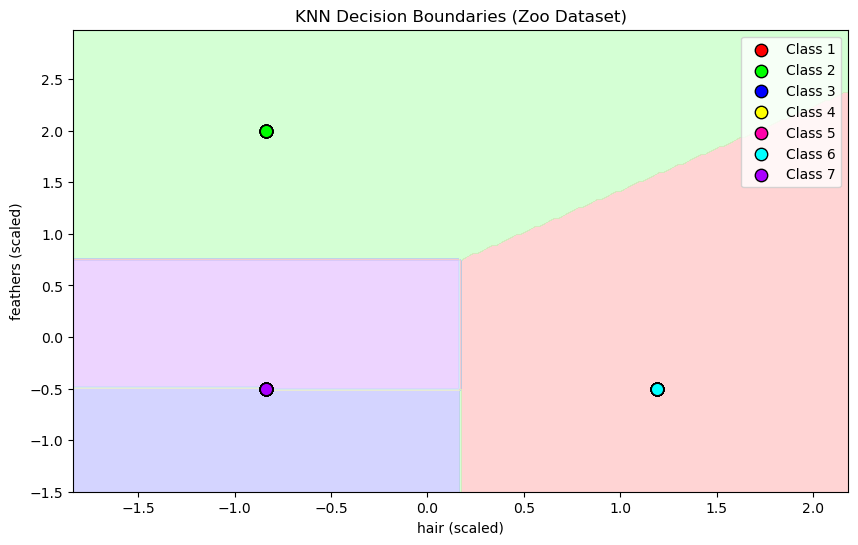

In [21]:
from matplotlib.colors import ListedColormap 
# --- Select 2 features for visualization ---
features = ['hair', 'feathers']  # Choose any 2 features
X = df[features]
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train KNN on 2 features only ---
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_scaled, y_train)

# --- Create meshgrid for decision boundary ---
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAACC', '#AAFFFF', '#DDAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00AA', '#00FFFF', '#AA00FF'])

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

# Plot training points
for idx, class_label in enumerate(np.unique(y)):
    plt.scatter(X_train_scaled[y_train == class_label, 0],
                X_train_scaled[y_train == class_label, 1],
                c=[cmap_bold(idx)],
                label=f'Class {class_label}',
                edgecolor='k',
                s=80)

plt.xlabel(features[0] + ' (scaled)')
plt.ylabel(features[1] + ' (scaled)')
plt.title('KNN Decision Boundaries (Zoo Dataset)')
plt.legend()
plt.show()